## ELEC3305 Lab 2 -  DTFT <br> <small> Python Lab 2 </small>

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [64]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

#this genreates nicer (interactive!) plots than inline,
#kernel restart required when switching however also doesn't seem to work 
#with "run all cells" :(
%matplotlib notebook
#%matplotlib inline


#Function for generating various dtftPlot
def dtftPlot(values, Omega, title):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.suptitle(title)
    axes[0,0].plot(Omega,np.abs(values))
    axes[0,0].set_title('DTFT Magnitude')
    axes[0,0].set_ylabel("Magnitude [Linear]")
    
    axes[0,1].plot(Omega,np.angle(values))
    axes[0,1].set_title('DTFT Phase')
    axes[0,1].set_ylim([-1, 1])
    axes[1,0].set_ylabel("Phase angle")
    
    axes[1,0].plot(Omega, values.real)
    axes[1,0].set_title("DTFT Real Part")
    axes[1,0].set_ylabel("Real Part value")
    
    axes[1,1].plot(Omega, values.imag)
    axes[1,1].set_title('DTFT Imag Part')
    axes[1,1].set_ylim([-1, 1])
    axes[1,0].set_ylabel("Imaginary Part Value")
    
    #need to reshape axes config to allow clean iteration
    for ax in axes.reshape(-1): 
        ax.set_xlabel('Normalised Freq')
    #add padding between subplots    
    plt.tight_layout(rect=[0, 0.03, 0.9, 0.90])
    return


Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

<IPython.core.display.Javascript object>


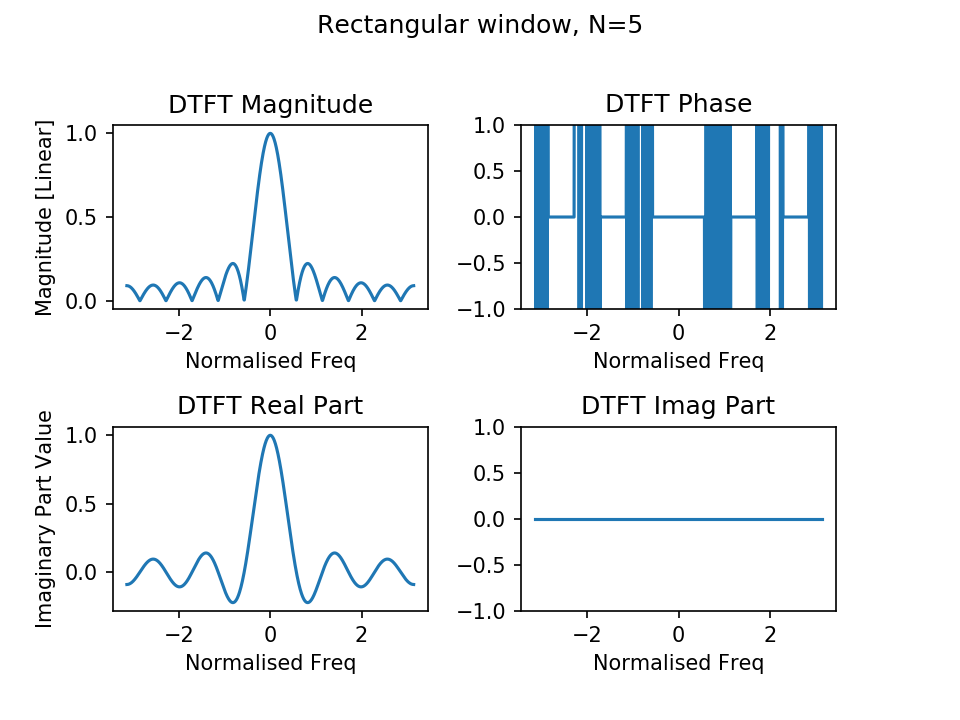

<IPython.core.display.Javascript object>


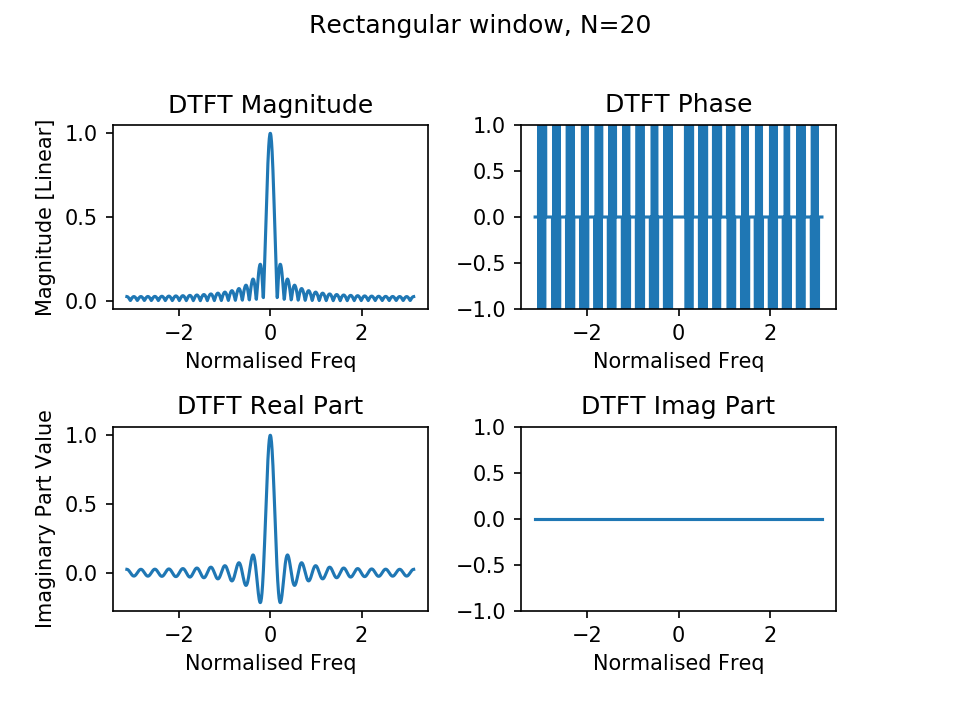

<IPython.core.display.Javascript object>


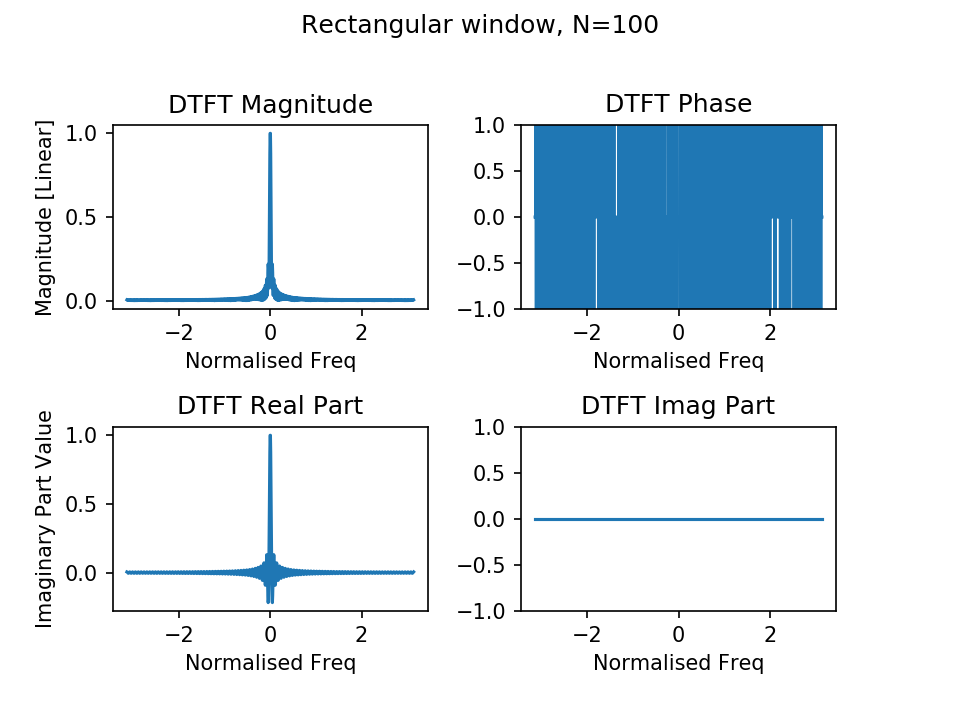

In [65]:
    #notes:
    # https://stackoverflow.com/questions/19739503/dft-matrix-in-python
    # http://python-for-signal-processing.blogspot.com.au/2013/02/discrete-fourier-transform.html
    # https://www.ee.iitb.ac.in/~bsraj/courses/ee603/lectnotes4.pdf
    #pg 832 of textbook
    
    M = 1024 
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]

        # create window function (w) using np.ones
        w = np.ones((2*N)+1)
        
        # create M-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,M)
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        indicies = np.outer(Omega,NN)
        
        # create DTFT matrix using np.exp
        dtftMat = np.exp(1j*indicies)
        
        # evaluate DTFT using dot function
        W = dtftMat.dot(w)
         
        # normalize W such that W at omega=0 is 1
        index = (int)(M/2)
        omegaZeroVal = W[index];
        
        W = W * 1/(omegaZeroVal);
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        
        dtftPlot(W,Omega,('Rectangular window, N=' + str(N)))
        
        

Describe the effect of increasing $N$ on the DTFT:

When N is increased the DTFT of the window becomes a narrower sinc over the same relative frequency range, this allows narrower pass bands and a steeper passband stopband rejection compared to lower N options.

----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

<IPython.core.display.Javascript object>


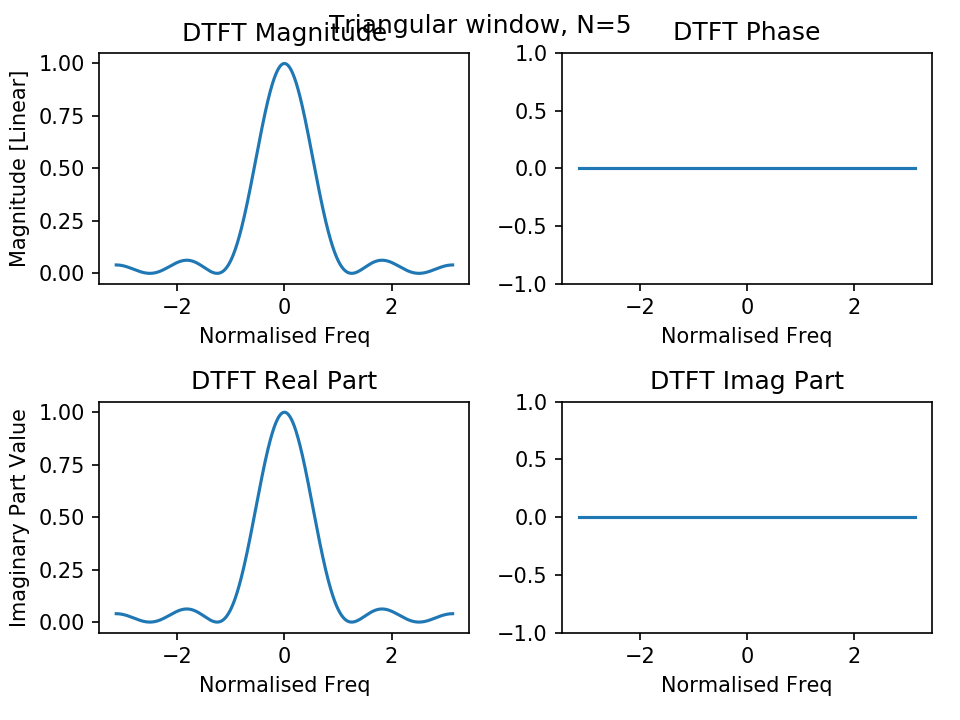

<IPython.core.display.Javascript object>


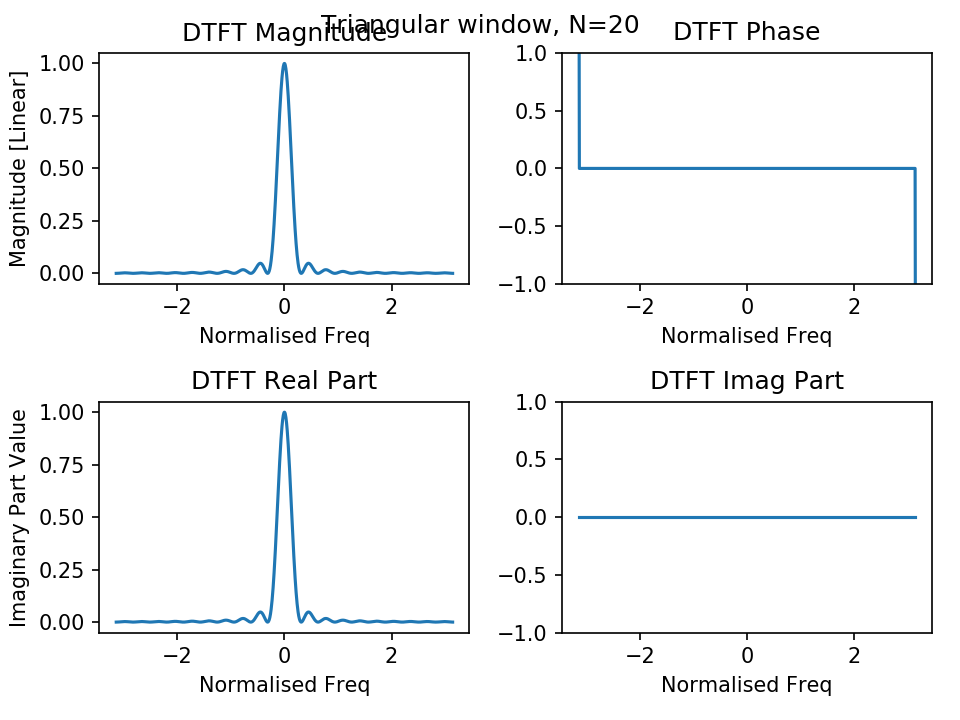

<IPython.core.display.Javascript object>


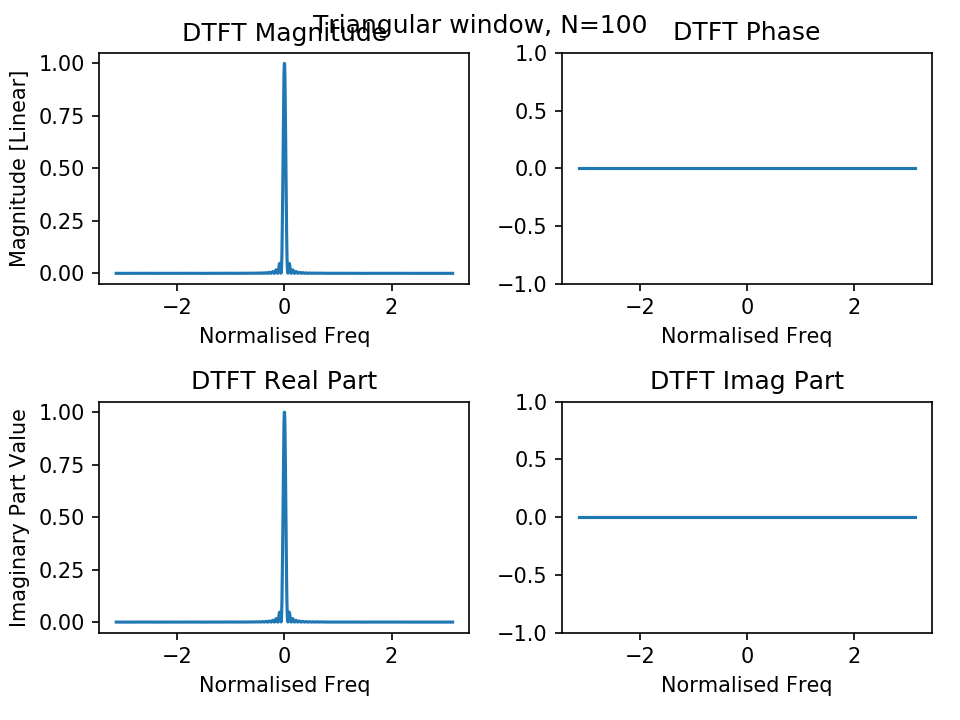

In [55]:
    M = 1024
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) 
        w = np.ones((2*N)+1)
        w = (1-(np.absolute(NN)/N))*w;
        
       # create M-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,M)
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        indicies = np.outer(Omega,NN)
        
        # create DTFT matrix using np.exp
        dtftMat = np.exp(1j*indicies)
        
        # evaluate DTFT using dot function
        W = dtftMat.dot(w)
         
        # normalize W such that W at omega=0 is 1
        index = (int)(M/2)
        omegaZeroVal = W[index];
        
        W = W * 1/(omegaZeroVal);
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        dtftPlot(W,Omega,('Triangular window, N=' + str(N)))
      

        

Describe the effect of increasing $N$ on the DTFT:

Similarly to increasing N in the rectangular window the tranisiton slope between pass and stopbands becomes steeper and more well defined to allow for better filtering. However the triangular window also has the advantage of not going negative when filtering.


----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.

We can see below that when the LPF is truncated with the rectangular window it creates a less unifrom passband center however it improves in reduction of sidelobes. When at the triangle window thought he improvement is more clear, there is less variation in magnitude in passband and the sidelobes are further reduced. Ultimately providing better filtering across all $N$. Additionally the triangle window doesn't introduce a phase shift.


### Solution for (c):

<IPython.core.display.Javascript object>


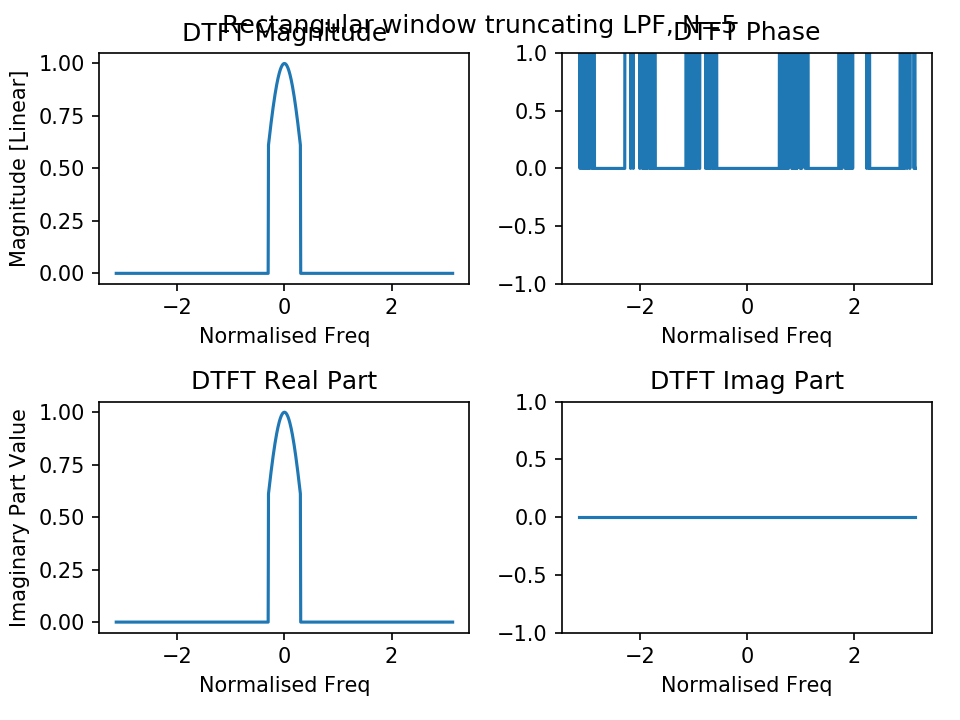

<IPython.core.display.Javascript object>


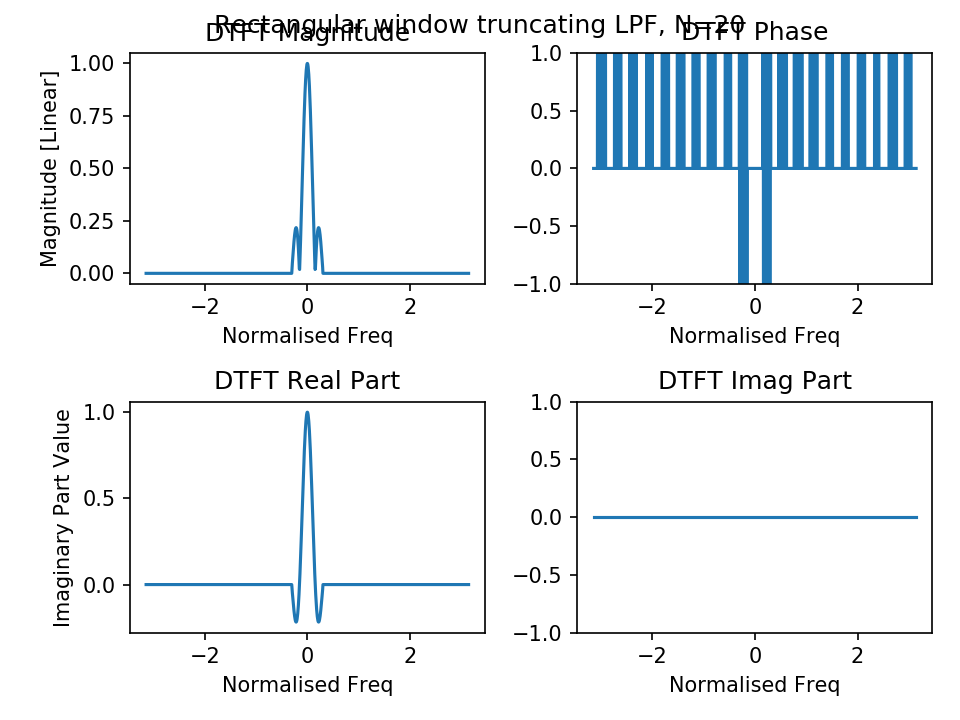

<IPython.core.display.Javascript object>


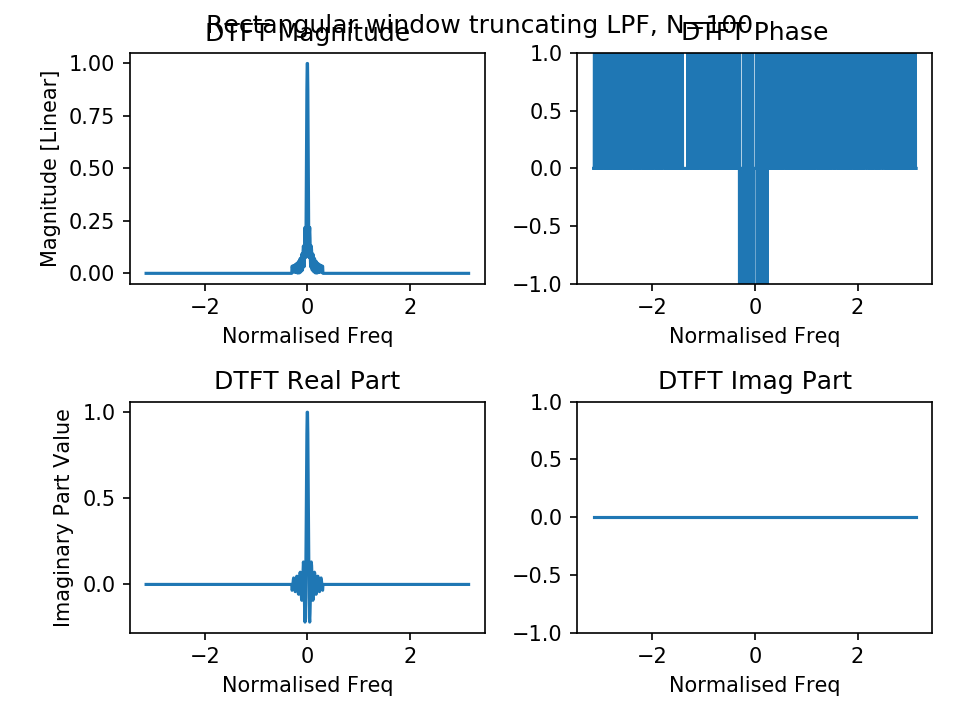

In [56]:
    M = 1024
    Omegac = 0.3
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
       # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create square window function (w) 
        w = np.ones((2*N)+1)
        

        #create M-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,M)
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        indicies = np.outer(Omega,NN)
        
        # create DTFT matrix using np.exp
        dtftMat = np.exp(1j*indicies)
        
        # evaluate DTFT using dot function
        W = dtftMat.dot(w)
         
        # normalize W such that W at omega=0 is 1
        index = (int)(M/2)
        omegaZeroVal = W[index];
        
        W = W * 1/(omegaZeroVal);
        
        
        #create LPF
        LPF = np.zeros(M) 
        LPF[np.where(np.absolute(Omega) < Omegac)] = 1;
        
        #truncate
        W = W * LPF
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        dtftPlot(W,Omega, ('Rectangular window truncating LPF, N=' + str(N)))

    

        

<IPython.core.display.Javascript object>


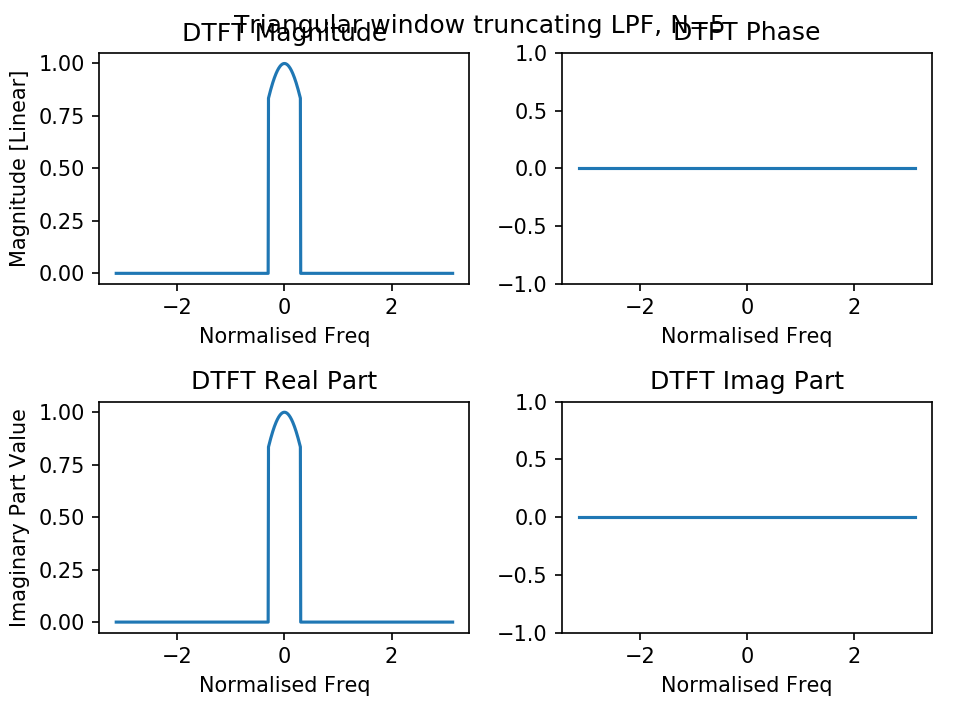

<IPython.core.display.Javascript object>


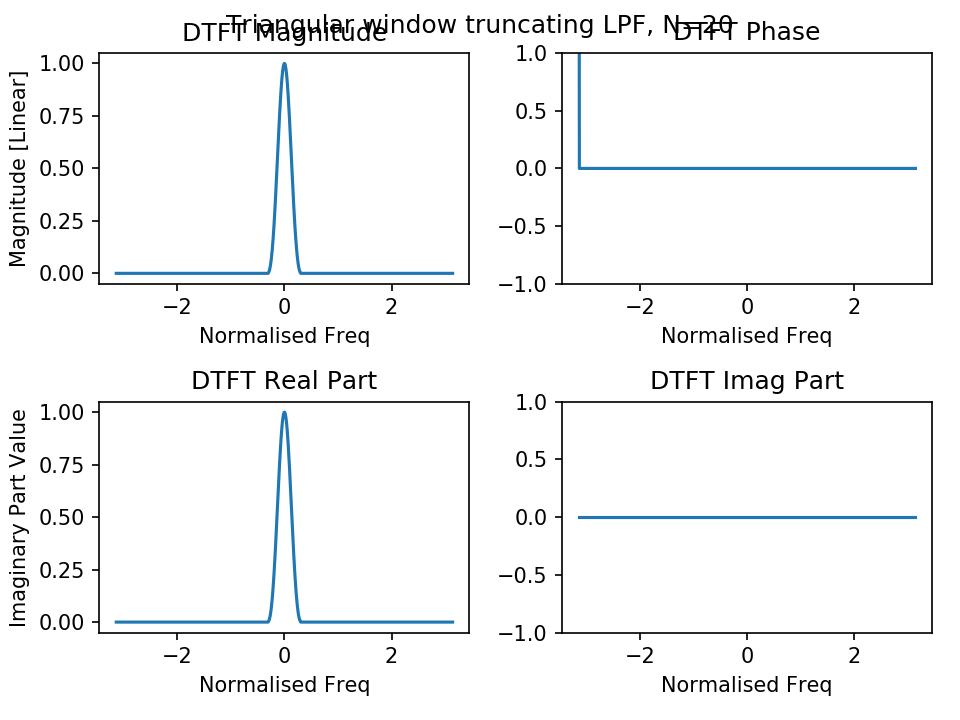

<IPython.core.display.Javascript object>


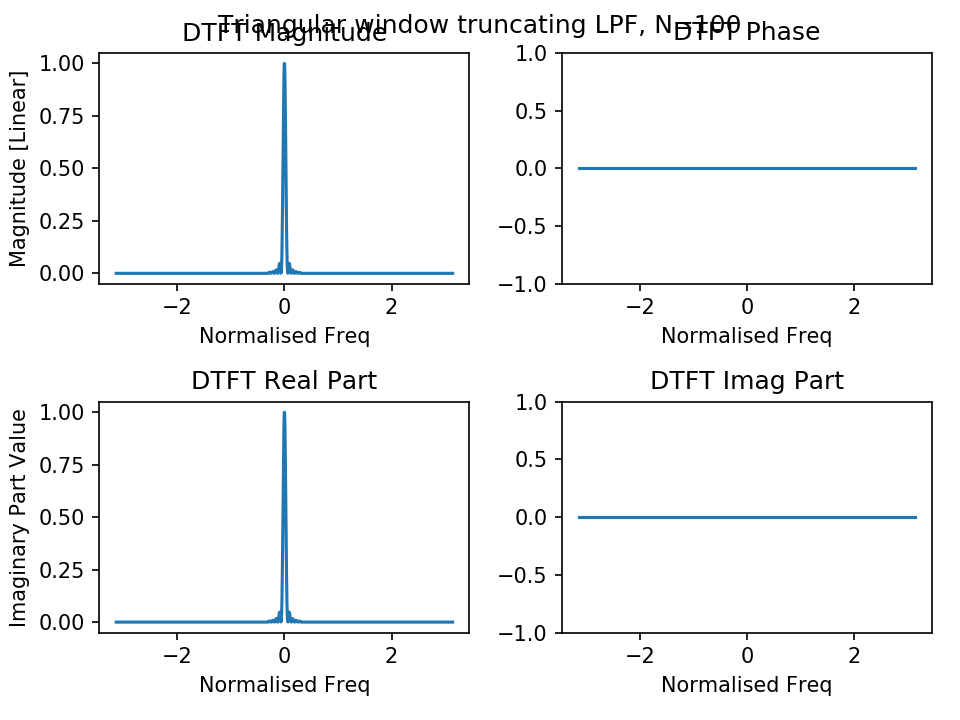

In [57]:
    M = 1024
    Omegac = 0.3
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
       # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create square window function (w) 
        w = np.ones((2*N)+1)
        w = (1-(np.absolute(NN)/N))*w;
        

        #create M-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.linspace(-np.pi,np.pi,M)
        
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.outer
        indicies = np.outer(Omega,NN)
        
        # create DTFT matrix using np.exp
        dtftMat = np.exp(1j*indicies)
        
        # evaluate DTFT using dot function
        W = dtftMat.dot(w)
         
        # normalize W such that W at omega=0 is 1
        index = (int)(M/2)
        omegaZeroVal = W[index];
        
        W = W * 1/(omegaZeroVal);
        
        
        #create LPF
        LPF = np.zeros(M) 
        LPF[np.where(np.absolute(Omega) < Omegac)] = 1;
        
        #truncate
        W = W * LPF
        
        # create plots
        # plot both real and imag on the same figure using subplots ( use W.real and W.imag )
        # add titles
        dtftPlot(W,Omega, ('Triangular window truncating LPF, N=' + str(N)))